# Final Project: Overview

# Objective

The objective of this project is for you to demonstrate your mastery of the Machine Learning process
**using Neural Networks**.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


## Import tensorflow and check the version
import tensorflow as tf
from tensorflow.keras.utils import plot_model

print("Running TensorFlow version ",tf.__version__)

# Parse tensorflow version
import re

version_match = re.match("([0-9]+)\.([0-9]+)", tf.__version__)
tf_major, tf_minor = int(version_match.group(1)) , int(version_match.group(2))
print("Version {v:d}, minor {m:d}".format(v=tf_major, m=tf_minor) )

Running TensorFlow version  2.6.0
Version 2, minor 6


In [2]:
#Get the data
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "/Users/juntao/Downloads/ML_Fall_2021-master/assignments/stock_prediction/Data"

data_file = "AAPL.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file), index_col = 'Dt' )

#target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4277, 8)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 2000-01-03 to 2016-12-30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  4277 non-null   float64
 1   Close      4277 non-null   float64
 2   Div        4277 non-null   float64
 3   Factor     4277 non-null   float64
 4   High       4277 non-null   float64
 5   Low        4277 non-null   float64
 6   Open       4277 non-null   float64
 7   Volume     4277 non-null   float64
dtypes: float64(8)
memory usage: 300.7+ KB


In [4]:
data.describe()

,Adj Close,Close,Div,Factor,High,Low,Open,Volume
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4.277000e+03
mean,34.065846,170.450354,0.001999,1.001870,172.424040,168.407568,170.528689,1.299660e+08
std,36.698987,173.484604,0.031011,0.094251,174.989551,171.934671,173.604272,9.970883e+07
min,0.815400,13.120000,0.000000,1.000000,13.190000,12.720000,12.990000,9.835000e+06
25%,3.115300,39.759000,0.000000,1.000000,40.260000,39.030000,39.530000,6.363350e+07
50%,16.948300,106.745000,0.000000,1.000000,108.360000,105.200000,106.959000,1.016484e+08
75%,62.413600,222.250000,0.000000,1.000000,224.980000,217.890000,220.010000,1.679636e+08
max,122.771400,702.100000,0.570000,7.000000,705.070000,699.570000,702.410000,1.855410e+09


In [5]:
data.head()

,Adj Close,Close,Div,Factor,High,Low,Open,Volume
Dt,,,,,,,,
2000-01-03,3.4785,111.938,0.0,1.0,112.500,101.688,104.8750,133949200.0
2000-01-04,3.1852,102.500,0.0,1.0,110.625,101.188,108.2500,128094400.0
2000-01-05,3.2318,104.000,0.0,1.0,110.563,103.000,103.7500,194580400.0
2000-01-06,2.9521,95.000,0.0,1.0,107.000,95.000,106.1183,191993200.0
2000-01-07,3.0920,99.500,0.0,1.0,101.000,95.500,96.5000,115183600.0


In [6]:
data.tail()

,Adj Close,Close,Div,Factor,High,Low,Open,Volume
Dt,,,,,,,,
2016-12-23,111.3073,116.52,0.0,1.0,116.5255,115.59,115.5900,14249500.0
2016-12-27,112.0142,117.26,0.0,1.0,117.8000,116.49,116.5200,18296900.0
2016-12-28,111.5366,116.76,0.0,1.0,118.0170,116.20,117.5200,20905900.0
2016-12-29,111.5079,116.73,0.0,1.0,117.1094,116.40,116.4500,15039500.0
2016-12-30,110.6386,115.82,0.0,1.0,117.2000,115.43,116.6577,30586300.0


Text(0.5, 1.0, 'AAPL Stock Price history')

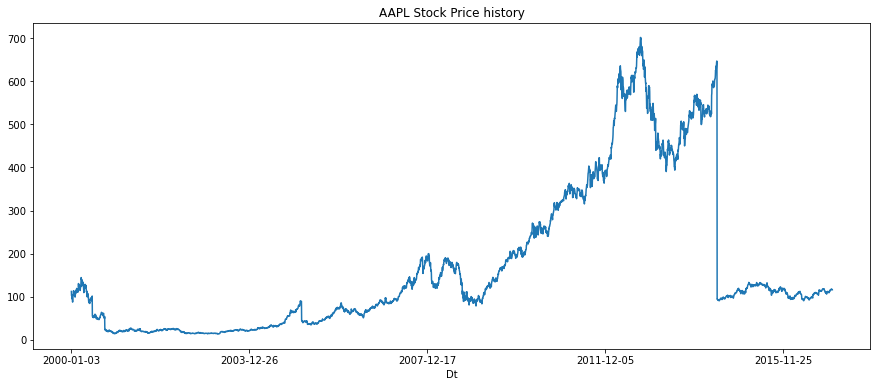

In [7]:
data['Close'].plot(figsize = (15,6))
plt.title('AAPL Stock Price history')

Text(0.5, 1.0, 'AAPL Return history')

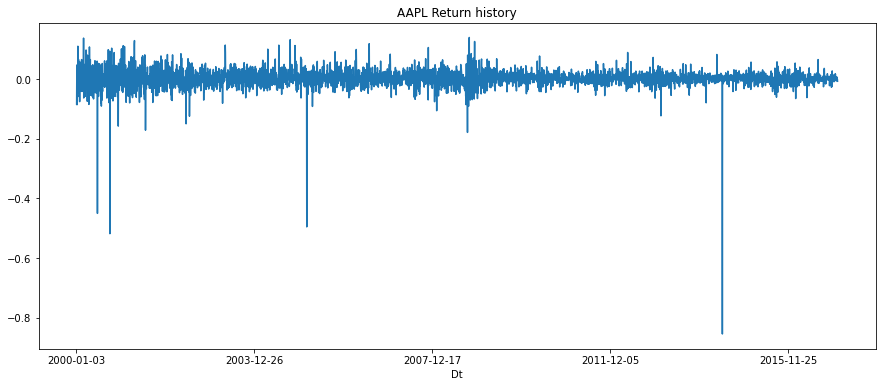

In [8]:
data['Close'].pct_change().plot(figsize = (15,6))
plt.title('AAPL Return history')

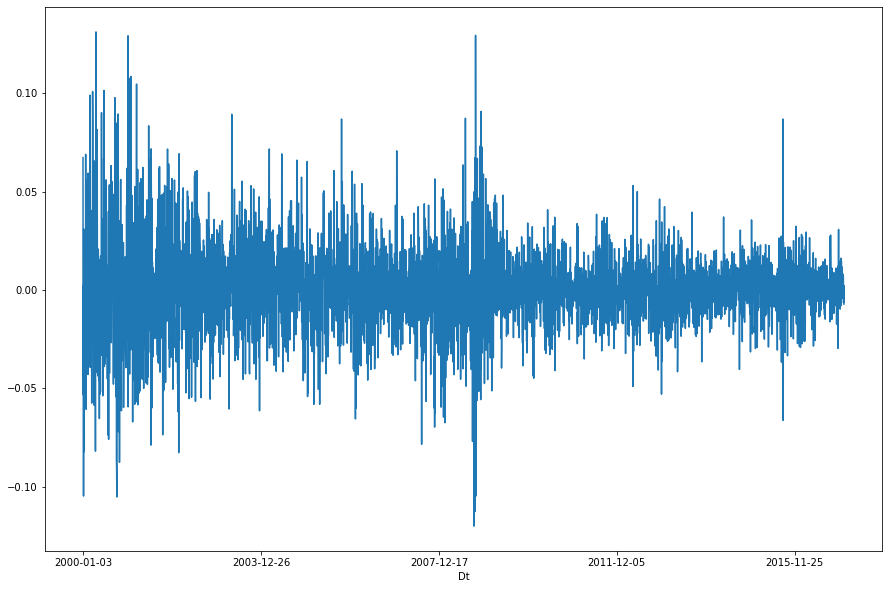

In [9]:
# daily return visualize
((data['Close']-data['Open'])/data['Open']).plot(figsize = (15,10))

In [10]:
data['daily_return'] = (data['Close']-data['Open'])/data['Open']

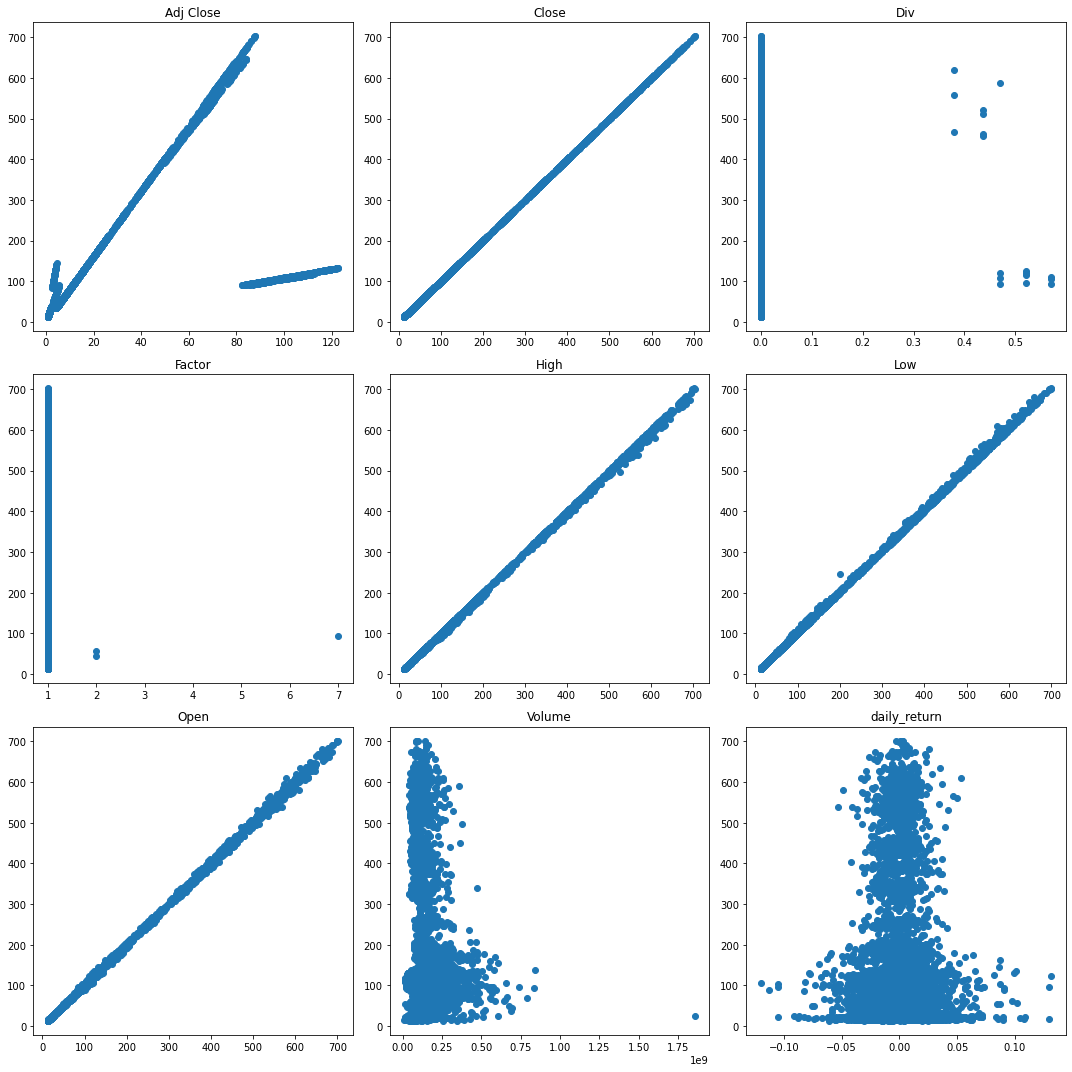

In [11]:
#Some features may not be necessary. Let's take a closer look on them
figure,ax = plt.subplots(3,3,figsize=(15,15))
plt.figsize=(6,3)
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.scatter(data.iloc[:,i], data["Close"])
    plt.title(f"{data.columns[i]}")
plt.tight_layout() 

In [12]:
for col in data:
    if data[col].isna().sum()>0:
        print(col,data[col].isna().sum())
#no null. very good!

In [13]:
data.head()

,Adj Close,Close,Div,Factor,High,Low,Open,Volume,daily_return
Dt,,,,,,,,,
2000-01-03,3.4785,111.938,0.0,1.0,112.500,101.688,104.8750,133949200.0,0.067347
2000-01-04,3.1852,102.500,0.0,1.0,110.625,101.188,108.2500,128094400.0,-0.053118
2000-01-05,3.2318,104.000,0.0,1.0,110.563,103.000,103.7500,194580400.0,0.002410
2000-01-06,2.9521,95.000,0.0,1.0,107.000,95.000,106.1183,191993200.0,-0.104773
2000-01-07,3.0920,99.500,0.0,1.0,101.000,95.500,96.5000,115183600.0,0.031088


In [14]:
y = data['Close'].pct_change().shift(-1)
y.head()

Dt
2000-01-03   -0.084315
2000-01-04    0.014634
2000-01-05   -0.086538
2000-01-06    0.047368
2000-01-07   -0.017588
Name: Close, dtype: float64

In [15]:
# Create train and test set. approximately 80% in the train dataset, approximately 20% in test dataset

from sklearn.model_selection import train_test_split

X_train = None
X_test = None
y_train = None
y_test = None

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, train_size = 0.8, shuffle = False)
X_train.head()

,Adj Close,Close,Div,Factor,High,Low,Open,Volume,daily_return
Dt,,,,,,,,,
2000-01-03,3.4785,111.938,0.0,1.0,112.500,101.688,104.8750,133949200.0,0.067347
2000-01-04,3.1852,102.500,0.0,1.0,110.625,101.188,108.2500,128094400.0,-0.053118
2000-01-05,3.2318,104.000,0.0,1.0,110.563,103.000,103.7500,194580400.0,0.002410
2000-01-06,2.9521,95.000,0.0,1.0,107.000,95.000,106.1183,191993200.0,-0.104773
2000-01-07,3.0920,99.500,0.0,1.0,101.000,95.500,96.5000,115183600.0,0.031088


In [16]:
y_train.head()

Dt
2000-01-03   -0.084315
2000-01-04    0.014634
2000-01-05   -0.086538
2000-01-06    0.047368
2000-01-07   -0.017588
Name: Close, dtype: float64

In [17]:
print(y_test.tail())
y_test = y_test.dropna()
print(y_test.tail())
X_test = X_test.drop(['2016-12-30'])

Dt
2016-12-23    0.006351
2016-12-27   -0.004264
2016-12-28   -0.000257
2016-12-29   -0.007796
2016-12-30         NaN
Name: Close, dtype: float64
Dt
2016-12-22    0.001978
2016-12-23    0.006351
2016-12-27   -0.004264
2016-12-28   -0.000257
2016-12-29   -0.007796
Name: Close, dtype: float64


In [18]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(855, 9)
(855,)
(3421, 9)
(3421,)


In [19]:
# standardize during process 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(X_train)
train0 = sc.transform(X_train)
test0 = sc.transform(X_test)

In [20]:
train0 = train0.reshape(train0.shape[0],1, train0.shape[1])
test0 = test0.reshape(test0.shape[0],1, test0.shape[1])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

model0 = Sequential()
model0.add(Input(shape =(train0.shape[1],train0.shape[2])))
model0.add(Dense(150, activation = 'relu'))
model0.add(Dropout(rate = 0.2))
model0.add(Dense(75, activation = 'relu'))
model0.add(Dropout(rate = 0.2))
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 150)            1500      
_________________________________________________________________
dropout (Dropout)            (None, 1, 150)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 75)             11325     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 75)             0         
Total params: 12,825
Trainable params: 12,825
Non-trainable params: 0
_________________________________________________________________


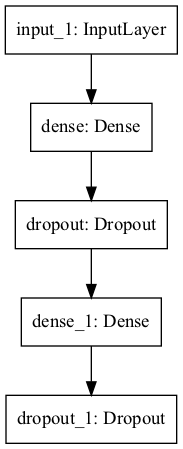

In [22]:
plot_model(model0)

In [23]:
model_name0 = "APPL only"

model0.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])
history0 = model0.fit(train0, y_train, epochs=10, batch_size = 30)

Epoch 1/10
115/115 [==============================] - 1s 1ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/10
115/115 [==============================] - 0s 1ms/step - loss: 9.6867e-04 - mean_squared_error: 9.6887e-04
Epoch 3/10
115/115 [==============================] - 0s 1ms/step - loss: 9.6825e-04 - mean_squared_error: 9.6837e-04
Epoch 4/10
115/115 [==============================] - 0s 1ms/step - loss: 9.6832e-04 - mean_squared_error: 9.6858e-04
Epoch 5/10
115/115 [==============================] - 0s 1ms/step - loss: 9.6787e-04 - mean_squared_error: 9.6813e-04
Epoch 6/10
115/115 [==============================] - 0s 1ms/step - loss: 9.6787e-04 - mean_squared_error: 9.6813e-04
Epoch 7/10
115/115 [==============================] - 0s 1ms/step - loss: 9.6773e-04 - mean_squared_error: 9.6708e-04
Epoch 8/10
115/115 [==============================] - 0s 1ms/step - loss: 9.6766e-04 - mean_squared_error: 9.6764e-04
Epoch 9/10
115/115 [==============================] - 0s 1ms/ste

In [24]:
num_parameters0 = model0.count_params()
print("Parameters number in model0: ", num_parameters0)

Parameters number in model0:  12825


In [25]:
score0 = model0.evaluate(test0, y_test)

print("{n:s}: Test loss: {l:3.5f} / Test accuracy: {a:3.5f}".format(n=model_name0, l=score0[0], a=score0[1]))

27/27 [==============================] - 0s 946us/step - loss: 0.0011 - mean_squared_error: 0.0012  
APPL only: Test loss: 0.00115 / Test accuracy: 0.00116


In [26]:
#To improve the model, I will 1.add more features 2.build more complex model 3.add validation in my model

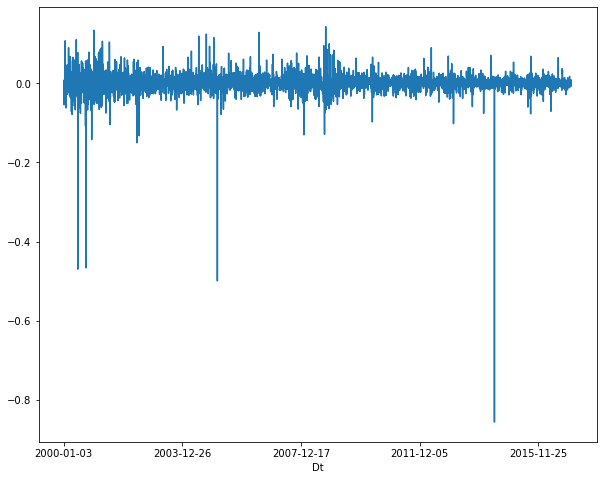

In [27]:
#average of In-day high and low
(((data['Low'] + data['High'])/2).pct_change()).plot(figsize = (10,8))

In [28]:
def feature(df):
    #volatility of the week
    df['Volatility_Open_week'] = df['Open'].pct_change().rolling(5).std()
    df['Volatility_week'] = df["Close"].pct_change().rolling(5).std()
    
    #mid price
    df['Mid_day_price_daily'] = (df['Close'] + df['Open'])/2
    df['Mid_price'] = (df['Low'] + df['High'])/2
    df['Mid_price_pct'] = df['Mid_price'].pct_change() 
    
    #moving average
    df['MA_week'] = df["Close"].pct_change().rolling(5).mean()
    df['MA_week_Daily'] = df['daily_return'].rolling(5).mean()
    
    return df

In [29]:
IBM_file = 'IBM.csv'
IBM = pd.read_csv( os.path.join(DATA_DIR, "train", IBM_file), index_col = 'Dt' )
print("Data shape: ", IBM.shape)

MSFT_file = 'MSFT.csv'
MSFT = pd.read_csv( os.path.join(DATA_DIR, "train", MSFT_file), index_col = 'Dt' )
print("Data shape: ", MSFT.shape)

SPY_file = 'SPY.csv'
SPY = pd.read_csv( os.path.join(DATA_DIR, "train", SPY_file), index_col = 'Dt' )
print("Data shape: ", SPY.shape)

XLK_file = 'XLK.csv'
XLK = pd.read_csv( os.path.join(DATA_DIR, "train", XLK_file), index_col = 'Dt' )
print("Data shape: ", XLK.shape)

Data shape:  (4277, 8)
Data shape:  (4277, 8)
Data shape:  (4277, 8)
Data shape:  (4277, 8)


In [30]:
# Rename data title
def Rename(df, name):
    rename_map = { orig:  name + "_" + orig.replace(" ", "_") for orig in df.columns.to_list() }
    return df.rename(columns=rename_map)

In [31]:
IBM = Rename(IBM, "IBM")
MSFT = Rename(MSFT, 'MSFT')
SPY = Rename(SPY, 'SPY')
XLK = Rename(XLK, 'XLK')

In [32]:
IBM.head()

,IBM_Adj_Close,IBM_Close,IBM_Div,IBM_Factor,IBM_High,IBM_Low,IBM_Open,IBM_Volume
Dt,,,,,,,,
2000-01-03,76.4112,116.000,0.0,1.0,116.000,111.8750,112.438,10347700.0
2000-01-04,73.8175,112.063,0.0,1.0,114.500,110.8750,114.000,8227800.0
2000-01-05,76.4112,116.000,0.0,1.0,119.750,112.1250,112.938,12733200.0
2000-01-06,75.0938,114.000,0.0,1.0,118.938,113.5004,118.000,7971900.0
2000-01-07,74.7644,113.500,0.0,1.0,117.938,110.6250,117.250,11856700.0


In [33]:
MSFT.head()

,MSFT_Adj_Close,MSFT_Close,MSFT_Div,MSFT_Factor,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Volume
Dt,,,,,,,,
2000-01-03,37.6233,116.563,0.0,1.0,118.625,112.000,117.375,53228400.0
2000-01-04,36.3524,112.625,0.0,1.0,117.125,112.250,113.563,54119000.0
2000-01-05,36.7357,113.813,0.0,1.0,116.375,109.375,111.125,64059600.0
2000-01-06,35.5051,110.000,0.0,1.0,113.875,108.375,112.188,54976600.0
2000-01-07,35.9691,111.438,0.0,1.0,112.250,107.313,108.625,62013600.0


In [34]:
SPY.head()

,SPY_Adj_Close,SPY_Close,SPY_Div,SPY_Factor,SPY_High,SPY_Low,SPY_Open,SPY_Volume
Dt,,,,,,,,
2000-01-03,100.4705,145.438,0.0,1.0,148.2472,143.875,148.250,8164300.0
2000-01-04,96.5415,139.750,0.0,1.0,144.0630,139.641,143.531,8089800.0
2000-01-05,96.7142,140.000,0.0,1.0,141.5284,137.250,139.938,12177900.0
2000-01-06,95.1599,137.750,0.0,1.0,141.5000,137.750,139.625,6227200.0
2000-01-07,100.6864,145.750,0.0,1.0,145.7500,140.063,140.313,8066500.0


In [35]:
XLK.head()

,XLK_Adj_Close,XLK_Close,XLK_Div,XLK_Factor,XLK_High,XLK_Low,XLK_Open,XLK_Volume
Dt,,,,,,,,
2000-01-03,43.6306,55.438,0.0,1.0,55.625,53.5000,55.625,938100.0
2000-01-04,41.4171,52.625,0.0,1.0,54.750,52.3130,54.000,545500.0
2000-01-05,40.8022,51.844,0.0,1.0,53.063,50.1250,51.750,1906000.0
2000-01-06,39.4496,50.125,0.0,1.0,52.094,49.6250,51.250,1670000.0
2000-01-07,40.1382,51.000,0.0,1.0,51.000,49.1263,49.625,686000.0


In [36]:
IBM['IBM_return'] = IBM['IBM_Close'].pct_change().shift(-1)
MSFT['MSFT_return'] = MSFT['MSFT_Close'].pct_change().shift(-1)
SPY['SPY_return'] = SPY['SPY_Close'].pct_change().shift(-1)
XLK['XLK_return'] = XLK['XLK_Close'].pct_change().shift(-1)

In [37]:
data = feature(data)
data.head(10)

,Adj Close,Close,Div,Factor,High,Low,Open,Volume,daily_return,Volatility_Open_week,Volatility_week,Mid_day_price_daily,Mid_price,Mid_price_pct,MA_week,MA_week_Daily
Dt,,,,,,,,,,,,,,,,
2000-01-03,3.4785,111.938,0.0,1.0,112.5000,101.688,104.8750,133949200.0,0.067347,NaN,NaN,108.40650,107.0940,NaN,NaN,NaN
2000-01-04,3.1852,102.500,0.0,1.0,110.6250,101.188,108.2500,128094400.0,-0.053118,NaN,NaN,105.37500,105.9065,-0.011088,NaN,NaN
2000-01-05,3.2318,104.000,0.0,1.0,110.5630,103.000,103.7500,194580400.0,0.002410,NaN,NaN,103.87500,106.7815,0.008262,NaN,NaN
2000-01-06,2.9521,95.000,0.0,1.0,107.0000,95.000,106.1183,191993200.0,-0.104773,NaN,NaN,100.55915,101.0000,-0.054143,NaN,NaN
2000-01-07,3.0920,99.500,0.0,1.0,101.0000,95.500,96.5000,115183600.0,0.031088,NaN,NaN,98.00000,98.2500,-0.027228,NaN,-0.011409
2000-01-10,3.0376,97.750,0.0,1.0,102.2500,94.750,102.0000,126266000.0,-0.041667,0.060553,0.059514,99.87500,98.5000,0.002545,-0.025288,-0.033212
2000-01-11,2.8822,92.750,0.0,1.0,99.3750,90.500,95.9380,110387200.0,-0.033230,0.060713,0.052755,94.34400,94.9375,-0.036168,-0.018655,-0.029234
2000-01-12,2.7094,87.188,0.0,1.0,95.5012,86.500,95.0000,244017200.0,-0.082232,0.059857,0.051522,91.09400,91.0006,-0.041468,-0.033575,-0.046163
2000-01-13,3.0065,96.750,0.0,1.0,98.7500,92.500,94.4840,258171200.0,0.023983,0.056515,0.071821,95.61700,95.6250,0.050817,0.005667,-0.020411


In [38]:
data['IBM_return'] = IBM['IBM_return']
data['MSFT_return'] = MSFT['MSFT_return']
data['SPY_return'] = SPY['SPY_return']
data['XLK_return'] = XLK['XLK_return']

data['Return'] = data['Close'].pct_change().shift(-1)
data.head(10)

,Adj Close,Close,Div,Factor,High,Low,Open,Volume,daily_return,Volatility_Open_week,...,Mid_day_price_daily,Mid_price,Mid_price_pct,MA_week,MA_week_Daily,IBM_return,MSFT_return,SPY_return,XLK_return,Return
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-03,3.4785,111.938,0.0,1.0,112.5000,101.688,104.8750,133949200.0,0.067347,NaN,...,108.40650,107.0940,NaN,NaN,NaN,-0.033940,-0.033784,-0.039109,-0.050741,-0.084315
2000-01-04,3.1852,102.500,0.0,1.0,110.6250,101.188,108.2500,128094400.0,-0.053118,NaN,...,105.37500,105.9065,-0.011088,NaN,NaN,0.035132,0.010548,0.001789,-0.014841,0.014634
2000-01-05,3.2318,104.000,0.0,1.0,110.5630,103.000,103.7500,194580400.0,0.002410,NaN,...,103.87500,106.7815,0.008262,NaN,NaN,-0.017241,-0.033502,-0.016071,-0.033157,-0.086538
2000-01-06,2.9521,95.000,0.0,1.0,107.0000,95.000,106.1183,191993200.0,-0.104773,NaN,...,100.55915,101.0000,-0.054143,NaN,NaN,-0.004386,0.013073,0.058076,0.017456,0.047368
2000-01-07,3.0920,99.500,0.0,1.0,101.0000,95.500,96.5000,115183600.0,0.031088,NaN,...,98.00000,98.2500,-0.027228,NaN,-0.011409,0.039648,0.007287,0.003431,0.038000,-0.017588
2000-01-10,3.0376,97.750,0.0,1.0,102.2500,94.750,102.0000,126266000.0,-0.041667,0.060553,...,99.87500,98.5000,0.002545,-0.025288,-0.033212,0.008475,-0.025612,-0.011966,-0.028335,-0.051151
2000-01-11,2.8822,92.750,0.0,1.0,99.3750,90.500,95.9380,110387200.0,-0.033230,0.060713,...,94.34400,94.9375,-0.036168,-0.018655,-0.029234,0.004202,-0.032567,-0.009945,-0.004258,-0.059968
2000-01-12,2.7094,87.188,0.0,1.0,95.5012,86.500,95.0000,244017200.0,-0.082232,0.059857,...,91.09400,91.0006,-0.041468,-0.033575,-0.046163,-0.010460,0.018901,0.013539,0.009157,0.109671
2000-01-13,3.0065,96.750,0.0,1.0,98.7500,92.500,94.4840,258171200.0,0.023983,0.056515,...,95.61700,95.6250,0.050817,0.005667,-0.020411,0.011628,0.041155,0.013579,0.022965,0.038119


In [39]:
for i in data:
    corr = y.corr(data[i])
    print(i,' ** ',corr)

Adj Close  **  -0.016649593936551292
Close  **  -0.022116755618929878
Div  **  -0.0070013868507017634
Factor  **  -0.0009637299608742636
High  **  -0.021688906076343703
Low  **  -0.021801858189730666
Open  **  -0.02170222554286149
Volume  **  0.0034197671639934154
daily_return  **  -0.06118587358829674
Volatility_Open_week  **  -0.03539963038638376
Volatility_week  **  -0.03635428856172996
Mid_day_price_daily  **  -0.021910569870443913
Mid_price  **  -0.02174565383824077
Mid_price_pct  **  -0.00247312263477763
MA_week  **  -0.0011017897829882625
MA_week_Daily  **  -0.03335732589071507
IBM_return  **  0.3488741230567065
MSFT_return  **  0.31096442776624195
SPY_return  **  0.4353812098790536
XLK_return  **  0.5135598310103203
Return  **  1.0


In [40]:
data = data.drop(["Div", 'Factor',"Volume","Mid_price_pct", "MA_week" ], axis = 1)

In [41]:
for col in data:
    if data[col].isna().sum()>0:
        print(col,data[col].isna().sum())

Volatility_Open_week 5
Volatility_week 5
MA_week_Daily 4
IBM_return 1
MSFT_return 1
SPY_return 1
XLK_return 1
Return 1


In [42]:
data = data.dropna(axis = 0)
data.shape

(4271, 16)

In [43]:
y = data.loc[:, 'Return'].to_frame()
data = data.drop(['Return'], axis = 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, train_size = 0.8, shuffle = False)
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.1, train_size = 0.9, shuffle = False)

In [45]:
colmns=[]
index_train = []
for col in X_train_:
    colmns.append(col)

In [46]:
sc.fit(X_train_)
X_train = sc.transform(X_train_)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [47]:
#convert X_train, X_test to dataframe because it would be easier for us 
X_train = pd.DataFrame(X_train, columns = colmns)
X_val = pd.DataFrame(X_val, columns = colmns)
X_test = pd.DataFrame(X_test, columns = colmns)
X_train.head()

,Adj Close,Close,High,Low,Open,daily_return,Volatility_Open_week,Volatility_week,Mid_day_price_daily,Mid_price,MA_week_Daily,IBM_return,MSFT_return,SPY_return,XLK_return
0,0.029257,0.140000,0.146418,0.137268,0.147029,0.311867,0.241859,0.236605,0.143432,0.141841,0.223220,0.594564,0.674075,0.354950,0.235113
1,0.027211,0.131729,0.141691,0.130156,0.137016,0.345437,0.242517,0.208780,0.134288,0.135932,0.259510,0.579063,0.663831,0.363245,0.332374
2,0.024936,0.122528,0.135322,0.123463,0.135466,0.150463,0.238992,0.203702,0.128915,0.129402,0.105064,0.525872,0.739644,0.459632,0.386561
3,0.028847,0.138346,0.140664,0.133503,0.134614,0.573081,0.225221,0.287268,0.136393,0.137072,0.340007,0.606004,0.772424,0.459795,0.442338
4,0.030356,0.144447,0.146418,0.145007,0.143726,0.495083,0.198195,0.282187,0.144001,0.145676,0.291272,0.446305,0.751997,0.371778,0.371040


In [48]:
def Reshape(dataset, M,y):
    X_set = []
    y_set = []
    for i in range (M,dataset.shape[0]):
        X_set.append(dataset.iloc[i-M: i, :].values)
        y_set.append(y.iloc[i, 0])
    X_set = np.asarray(X_set)
    y_set = np.asarray(y_set)
        
    return X_set, y_set

Xtrain1, ytrain1 = Reshape( X_train,10, y_train_)
Xtest1, ytest1 = Reshape(X_test,10,y_test)
Xval1, yval1 = Reshape(X_val,10,y_val)

In [49]:
print(Xtrain1.shape, ytrain1.shape)
print(Xtest1.shape, ytest1.shape)
print(Xval1.shape, yval1.shape)

(3064, 10, 15) (3064,)
(845, 10, 15) (845,)
(332, 10, 15) (332,)


In [50]:
from tensorflow.keras.layers import SimpleRNN
model_name = 'RNN'
model1 = Sequential()
model1.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (Xtrain1.shape[1],Xtrain1.shape[2])))
model1.add(Dropout(rate = 0.2))
#--------------
model1.add(SimpleRNN(units = 50, return_sequences = False))
model1.add(Dropout(rate = 0.2))
model1.add(Dense(1))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10, 50)            3300      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 8,401
Trainable params: 8,401
Non-trainable params: 0
_________________________________________________________________


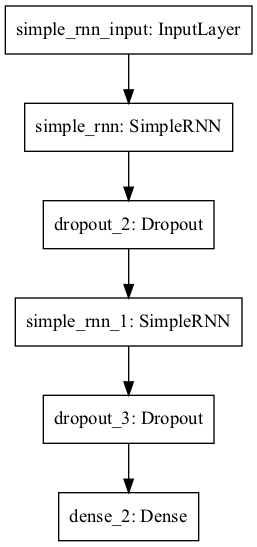

In [51]:
plot_model(model1)

In [52]:
model_name1 = "APPL with new factors, RNN"

model1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])
history1 = model1.fit(Xtrain1, ytrain1, epochs=10, validation_data=(Xval1, yval1))

Epoch 1/10
96/96 [==============================] - 2s 6ms/step - loss: 0.1246 - mean_squared_error: 0.1246 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 2/10
96/96 [==============================] - 0s 4ms/step - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 7.3575e-04 - val_mean_squared_error: 7.3575e-04
Epoch 3/10
96/96 [==============================] - 0s 4ms/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 4/10
96/96 [==============================] - 0s 4ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 5/10
96/96 [==============================] - 0s 4ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 4.6142e-04 - val_mean_squared_error: 4.6142e-04
Epoch 6/10
96/96 [==============================] - 0s 4ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 4.2576e-04 - val_mean_squared_error: 4.2576e-04
Epoch 7/10
96/96

In [53]:
num_parameters1 = model1.count_params()
print("Parameters number in model0: ", num_parameters1)

Parameters number in model0:  8401


In [54]:
score1 = model1.evaluate(Xtest1, ytest1)
print("{n:s}: Test loss: {l:3.5f} / Test accuracy: {a:3.5f}".format(n=model_name1, l=score1[0], a=score1[1]))

27/27 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
APPL with new factors, RNN: Test loss: 0.00119 / Test accuracy: 0.00119


In [55]:
# Predicted value and RMSE
y_pred1 = model1.predict(Xtest1)
rmse = np.sqrt(np.mean(np.square(ytest1 - y_pred1)))
print("RMSE in RNN model: ", rmse)

RMSE in RNN model:  0.03461232363969251


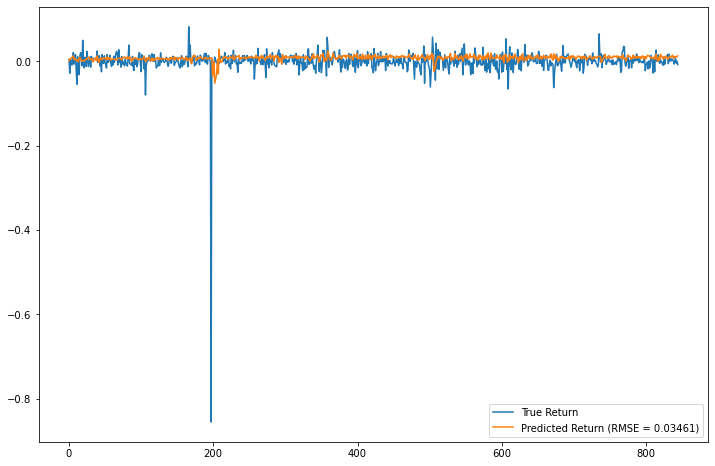

In [56]:
fig, axs = plt.subplots(figsize = (12, 8))
axs.plot(ytest1, label = "True Return")
axs.plot(y_pred1, label = "Predicted Return (RMSE = {:0.5f})".format(rmse))
axs.legend()

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout

model2 = Sequential()
model2.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (Xtrain1.shape[1],Xtrain1.shape[2])))
model2.add(Dropout(rate = 0.2))
#--------------
model2.add(LSTM(units = 50, activation = 'relu', return_sequences = False))
model2.add(Dropout(rate = 0.2))
model2.add(Dense(1, activation = 'linear'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            13200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 33,451
Trainable params: 33,451
Non-trainable params: 0
_________________________________________________________________


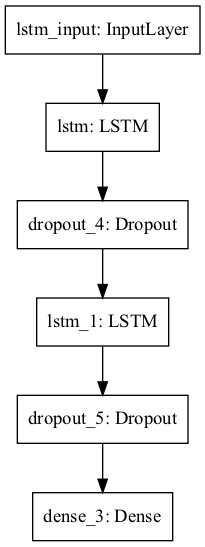

In [58]:
plot_model(model2)

In [59]:
model_name2 = "APPL with new factors, LSTM"

model2.compile(optimizer = 'RMSProp', loss = 'mean_squared_error', metrics=['mean_squared_error'])
history2 = model2.fit(Xtrain1, ytrain1, epochs=10, validation_data=(Xval1, yval1))

Epoch 1/10
96/96 [==============================] - 2s 9ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 4.7845e-04 - val_mean_squared_error: 4.7845e-04
Epoch 2/10
96/96 [==============================] - 1s 6ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 4.8337e-04 - val_mean_squared_error: 4.8337e-04
Epoch 3/10
96/96 [==============================] - 1s 6ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 3.8422e-04 - val_mean_squared_error: 3.8422e-04
Epoch 4/10
96/96 [==============================] - 1s 6ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 3.9170e-04 - val_mean_squared_error: 3.9170e-04
Epoch 5/10
96/96 [==============================] - 1s 6ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 3.9673e-04 - val_mean_squared_error: 3.9673e-04
Epoch 6/10
96/96 [==============================] - 1s 6ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 3.9789e-04 - val_mean_squared_error: 3.9

In [60]:
num_parameters2 = model2.count_params()
print("Parameters number in model0: ", num_parameters2)

Parameters number in model0:  33451


In [61]:
score2 = model1.evaluate(Xtest1, ytest1)

print("{n:s}: Test loss: {l:3.5f} / Test accuracy: {a:3.5f}".format(n=model_name2, l=score2[0], a=score2[1]))

27/27 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
APPL with new factors, LSTM: Test loss: 0.00119 / Test accuracy: 0.00119


In [62]:
# Predicted value and RMSE
y_pred2 = model2.predict(Xtest1)
rmse = np.sqrt(np.mean(np.square(ytest1 - y_pred2)))
print("RMSE in LSTM model: ", rmse)

RMSE in LSTM model:  0.033223518313132215


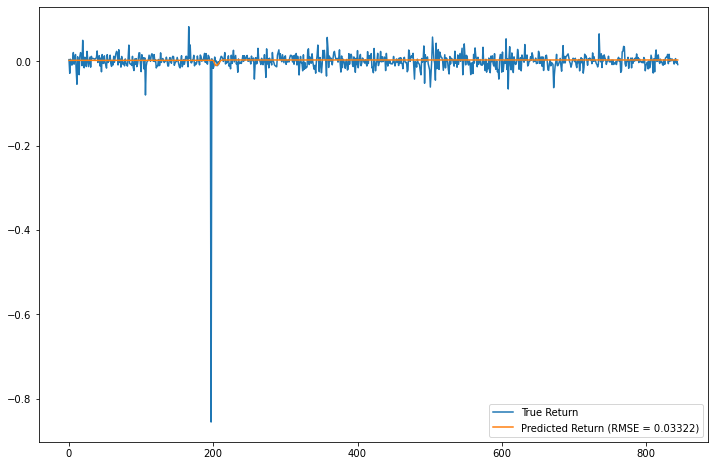

In [63]:
fig, axs = plt.subplots(figsize = (12, 8))
axs.plot(ytest1, label = "True Return")
axs.plot(y_pred2, label = "Predicted Return (RMSE = {:0.5f})".format(rmse))
axs.legend()

# Submission requirements

The guidelines will be similar to the Midterm
- you will write a procedure that takes raw data and produces predictions

You will submit a *single* model for evaluation.

**Demonstrate that all cells in your notebook work**

The final cell in your notebook should print the message "Done"
- `print("Done")`
- If we run your notebook and this last cell does not execute your submission will be inadequate

## Testing

*You must perform out of sample testing*.

If you want to perform cross-validation in training, that is fine, but you
must *also* test out of sample to show that you are not over-fitting.

It is up to you to create the out of sample data that you feel best evaluates your model.

We will create holdout data (that we will not show you) for grading.

The procedure you write to make predictions should be able to work on the unseen holdout data
(similar to how it should work for your test set but the holdout set has *no targets*)

    

# The data

Data will be provided to you 
- as multiple files in a directory which we refer to as a *data directory*

The reason for this is that the different files may convey different information.

You will be responsible for deciding
- which files to use
- which fields within the files to use

We will give you a data directory for training.

# Submission guidelines

Here are the basics, a code template that you must complete is in the following cells
- you will be required to store  your model in a file
- you will be required to write a procedure `MyModel` that takes two arguments
    - `test_dir`
        - this is a *relative path* to the holdout data directory
    - `model_path`
        - this is a *relative path* to the file containing your model
- the holdout data directory is similar in structure to the training data directory
    - but without target labels !  It is your job to predict these.
- your procedure must produce predictions given this holdout data directory

This means that your procedure must
- prepare the files in the holdout data directory similar to the way that they were prepared in the training data directory

We will provide you with a sample data directory that will resemble the holdout -- this is so that you
may test the procedure you write for submission.



## Detailed submission guidelines


In **addition to your notebook that trains/evaluates your model**, 
- please also submit an **archive file of the directory** whose name is stored in `model_path`, which 
contains your trained model.
    - use `saveModel` to put your final, trained model in this directory
- We will **not** train your model; we will only use the method `MyModel`
    - which **you** will implement
    - and which uses `loadModel` and the directory whose name is stored in `model_path`
    - this will create the model that we will evaluate


Here is a code template for you to complete
- it will save your model (assuming it is in variable `my_model`)
- it provides the specification for procedure `MyModel`, which *you must complete*


In [64]:
import os
from tensorflow.keras.models import load_model

modelName = "final_model"
model_path = os.path.join(".", modelName)

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'weights.h5'))
    
    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))
    
def loadModel(model_path):
    # Reload the model from the 2 files we saved
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'weights.h5'))
    
    return model

def MyModel(test_dir, model_path):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_path)
    
    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    data_file = "AAPL.csv"
    data = pd.read_csv( os.path.join(DATA_DIR, "sample", data_file), index_col = 'Dt' )
    data['daily_return'] = (data['Close']-data['Open'])/data['Open']
    
    IBM_file = 'IBM.csv'
    IBM = pd.read_csv( os.path.join(DATA_DIR, "sample", IBM_file), index_col = 'Dt' )
    MSFT_file = 'MSFT.csv'
    MSFT = pd.read_csv( os.path.join(DATA_DIR, "sample", MSFT_file), index_col = 'Dt' )

    SPY_file = 'SPY.csv'
    SPY = pd.read_csv( os.path.join(DATA_DIR, "sample", SPY_file), index_col = 'Dt' )

    XLK_file = 'XLK.csv'
    XLK = pd.read_csv( os.path.join(DATA_DIR, "sample", XLK_file), index_col = 'Dt' )
    
    IBM = Rename(IBM, "IBM")
    MSFT = Rename(MSFT, 'MSFT')
    SPY = Rename(SPY, 'SPY')
    XLK = Rename(XLK, 'XLK')
    
    IBM['IBM_return'] = IBM['IBM_Close'].pct_change().shift(-1)
    MSFT['MSFT_return'] = MSFT['MSFT_Close'].pct_change().shift(-1)
    SPY['SPY_return'] = SPY['SPY_Close'].pct_change().shift(-1)
    XLK['XLK_return'] = XLK['XLK_Close'].pct_change().shift(-1)
    
    test = feature(data)

    test['IBM_return'] = IBM['IBM_return']
    test['MSFT_return'] = MSFT['MSFT_return']
    test['SPY_return'] = SPY['SPY_return']
    test['XLK_return'] = XLK['XLK_return']
    
    test['Return'] = test['Close'].pct_change().shift(-1)
    

    test = test.drop(["Div", 'Factor',"Volume","Mid_price_pct", "MA_week"], axis = 1)
    
    test = test.dropna(axis = 0)
    
    y = test.loc[:, 'Return'].to_frame()
    test = test.drop(['Return'], axis = 1)
    
    t = sc.transform(test)
    
    test = pd.DataFrame(t, columns = colmns)
    
    X_test, y_test = Reshape(test, 10, y)
    
    predictions = model2.predict(X_test)
    
    # We need to match your array of predictions with the examples you are predicting
    # The array below (ids) should have a one-to-one correspondence and identify the example your are predicting
    # For Bankruptcy: the Id column
    # For Stock prediction: the date on which you are making a prediction

    ids = test.index
    # YOUR CODE GOES HERE
    
    
    return predictions, ids

# Assign to variable my_model the model that is your final model (the one  you will be evaluated on)
my_model = model2 # CHANGE None to your model !

saveModel(my_model, model_path)

Directory ./final_model already exists, files will be over-written.
Model saved in directory ./final_model; create an archive of this directory and submit with your assignment.


## Evaluate your model on the holdout data directory

**You must run the following cell** from the directory that contains your model file

Here is how we will evaluate your submission
- we will create a directory whose only content is
    - sub-directory `Data`
- we will copy your model file to this directory with the name stored in `model_path`
- we will run the cell in your notebook that should be a copy of the one below
    - it calls procedure `MyModel` with the arguments given below
    - your implementation of `MyModel`
        - must successfully load your model file, *given where **we** have place it as described above*
        - must successfully return one prediction for each example in the holdout directory *given where **we** have placed the holdout directory*

In [65]:
holdout_dir = os.path.join(".", "Data", "sample")
predicts = MyModel(holdout_dir, model_path)

In [66]:
predicts[0], predicts[1]

(array([[0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309262],
        [0.00309292],
        [0.00309262],
        [0.00309262],
        [0.00309442],
        [0.00309262],
        [0.00309262],
        [0.00309832],
        [0

In [67]:
print("Done")

Done
